In [15]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
from six.moves import urllib
from scipy.stats import normaltest
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:

data = pd.read_csv('/content/dataframe_.csv')

In [3]:

data.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [4]:

data.columns

Index(['input', 'output'], dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
input,1696.0,1.159933,79.005970,-134.962839,-63.386506,10.195194,70.264109,134.605775
output,1696.0,-34.088017,65.771112,-132.422167,-80.026767,-50.470981,-11.000000,134.425495


In [7]:
data.shape

(1697, 2)

In [8]:
num_col = [feature for feature in data.columns if data[feature].dtype!='O']

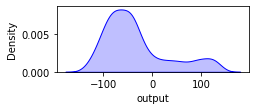

In [10]:
#UA of Num Values
plt.figure(figsize=(20, 20))
for i in range(1, len(num_col)):
    plt.subplot(14, 5, i+1)
    sns.kdeplot(x=data[num_col[i]],shade=True, color='b')
    plt.xlabel(num_col[i])

In [11]:
data.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [13]:
data.isnull().sum()

input     1
output    1
dtype: int64

In [34]:
data[(list(data.columns)[1:])].corr()

,output
output,1.0


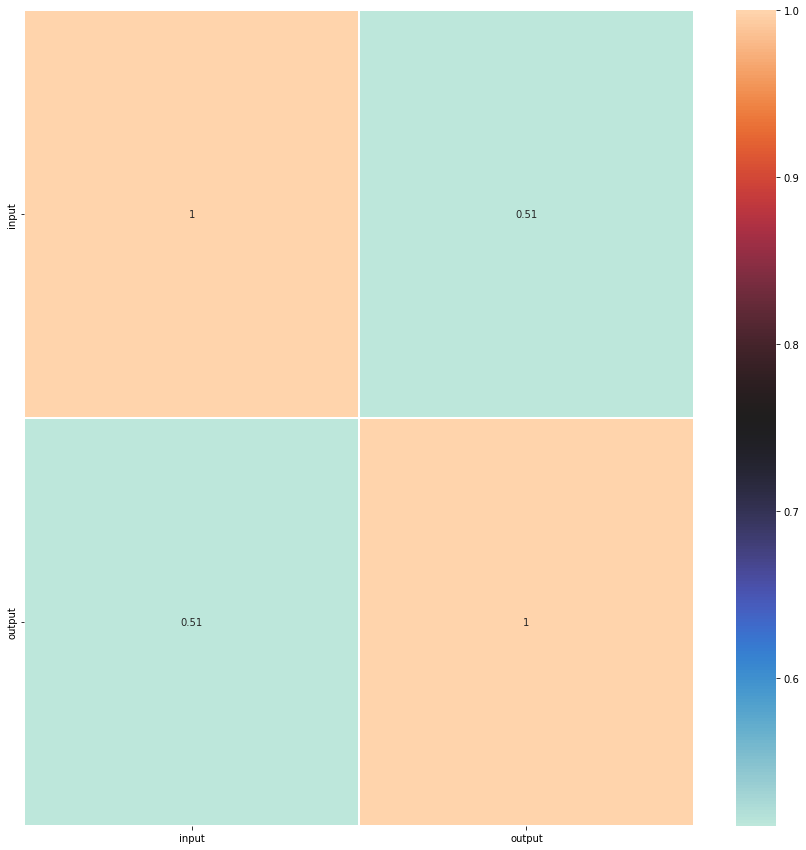

In [35]:
#corr between variable
sns.heatmap(data.corr(),annot=True,cmap='icefire',linewidths=0.5)
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.show() 

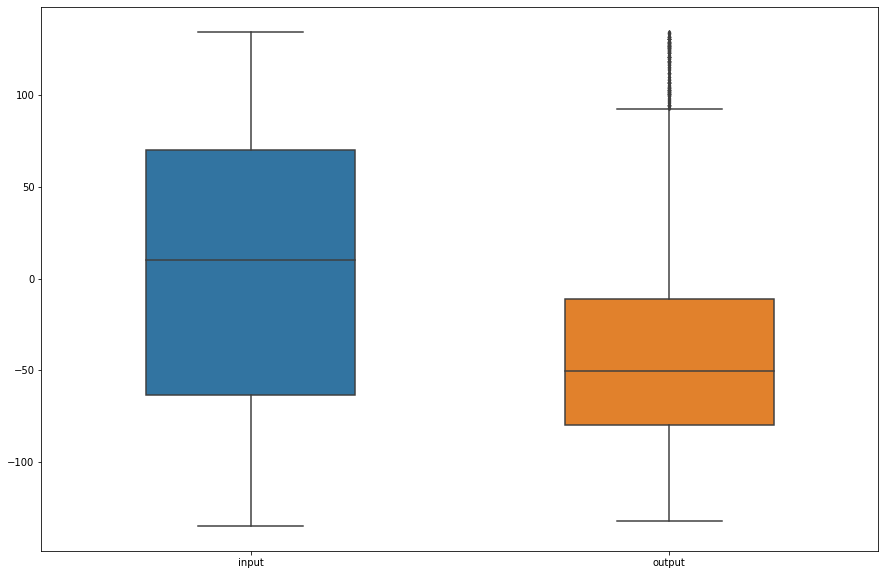

In [36]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [38]:
#data_n = data.drop(['input'], axis=1)

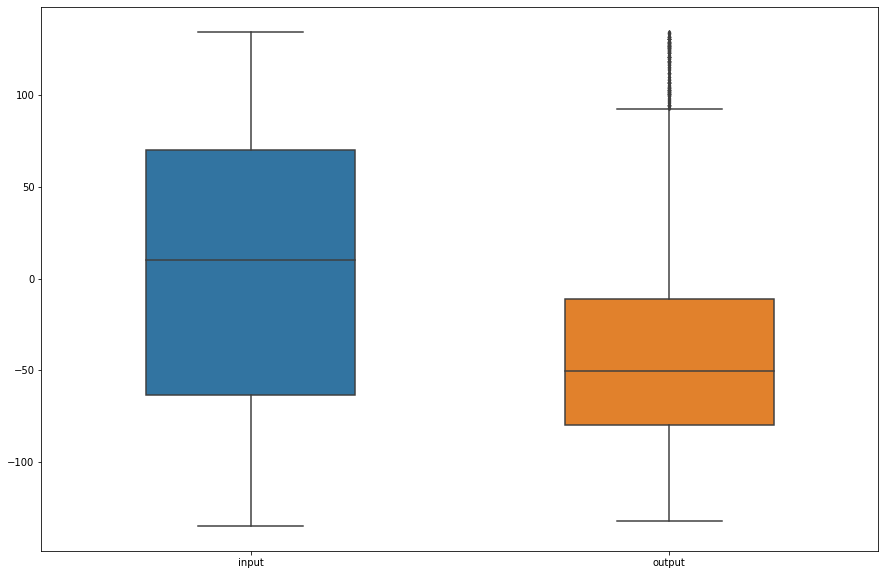

In [53]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [54]:
from sklearn.preprocessing import LabelEncoder
le_classes = LabelEncoder()
data['output'] = le_classes.fit_transform(data['output'])

In [55]:
X = data.drop(columns = ['input'])
y = data['output']

In [57]:
x

'output'

In [56]:
y

0         2
1         4
2         3
3        12
4        34
       ... 
1692    245
1693    193
1694    157
1695     64
1696     78
Name: output, Length: 1697, dtype: int64

In [48]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [58]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [60]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 0)

In [61]:
from sklearn.ensemble import RandomForestClassifier
rand_reg = RandomForestClassifier()

rand_reg.fit(x_train,y_train)

RandomForestClassifier()

In [62]:
y_pred = rand_reg.predict(x_test)

In [63]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.6023529411764705